In [ ]:
'''
【项目06】  多场景下的图表可视化表达

课程数据：
2016年奥运运动员数据，数据格式为xlsx，分3个sheet

1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

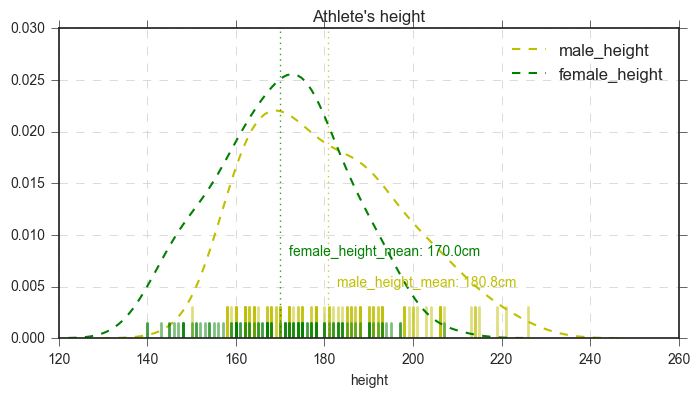

In [4]:
'''
1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

'''

import os
os.chdir('C:\\Users\\Hjx\\Desktop\\')
# 创建工作路径

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=1,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

data = df[['event','name','gender','height']]
data.dropna(inplace = True)   # 去掉缺失值
data_male = data[data['gender'] == '男']
data_female = data[data['gender'] == '女']
# 筛选数据，按照目标字段筛选
# 提取男女数据

hmean_male = data_male['height'].mean()
hmean_female = data_female['height'].mean()
# 计算男女平均身高

sns.set_style("ticks")
# 图表风格设置
# 风格选择包括："white", "dark", "whitegrid", "darkgrid", "ticks"

plt.figure(figsize = (8,4))  # 设置作图大小
sns.distplot(data_male['height'],hist = False,kde = True,rug = True,
             rug_kws = {'color':'y','lw':2,'alpha':0.5,'height':0.1} ,   # 设置数据频率分布颜色
             kde_kws={"color": "y", "lw": 1.5, 'linestyle':'--'},        # 设置密度曲线颜色，线宽，标注、线形
             label = 'male_height')
sns.distplot(data_female['height'],hist = False,kde = True,rug = True,
             rug_kws = {'color':'g','lw':2,'alpha':0.5} , 
             kde_kws={"color": "g", "lw": 1.5, 'linestyle':'--'},
             label = 'female_height')
# 绘制男女高度分布密度图

plt.axvline(hmean_male,color='y',linestyle=":",alpha=0.8) 
plt.text(hmean_male+2,0.005,'male_height_mean: %.1fcm' % (hmean_male), color = 'y')
# 绘制男运动员平均身高辅助线

plt.axvline(hmean_female,color='g',linestyle=":",alpha=0.8)
plt.text(hmean_female+2,0.008,'female_height_mean: %.1fcm' % (hmean_female), color = 'g')
# 绘制女运动员平均身高辅助线

plt.ylim([0,0.03])
plt.grid(linestyle = '--')     # 添加网格线
plt.title("Athlete's height")  # 添加图表名
# 图表其他内容

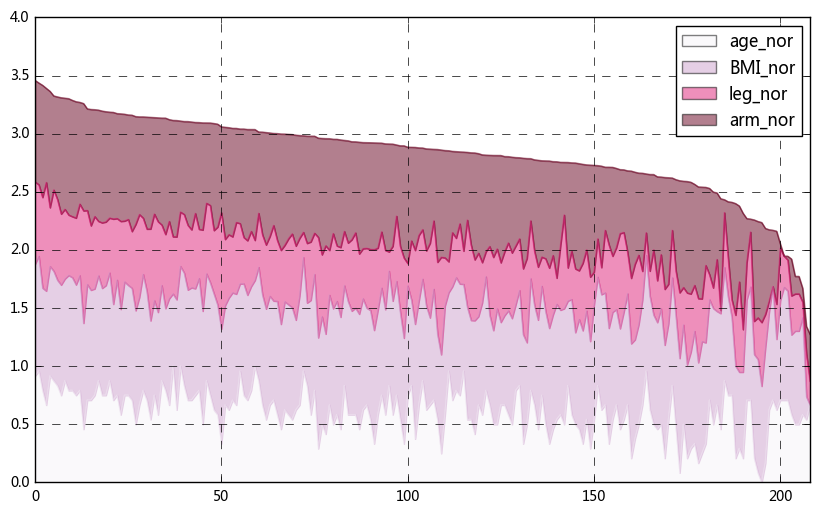

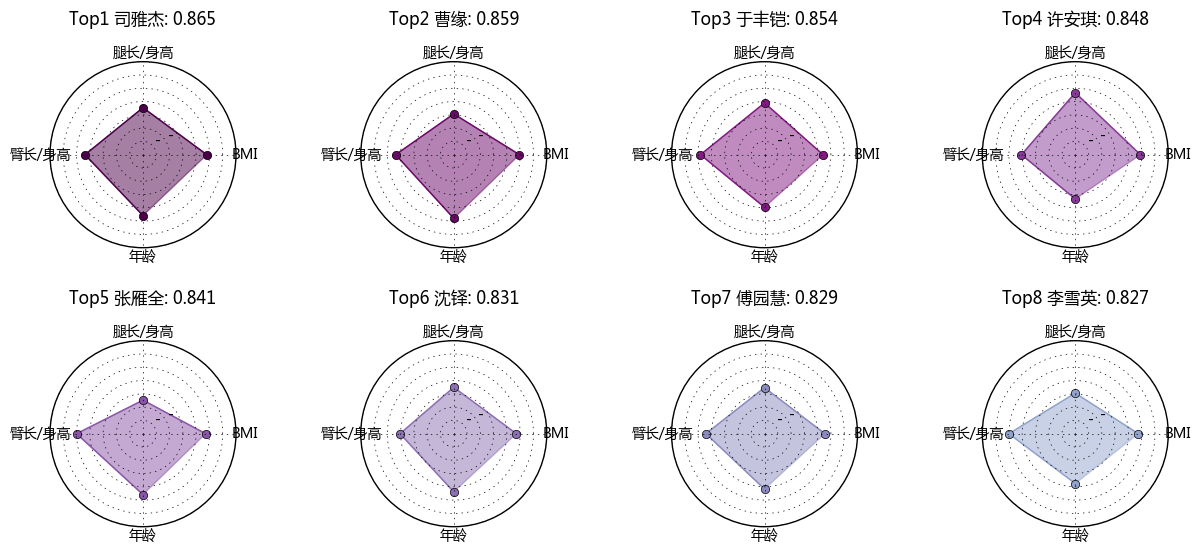

In [2]:
'''
2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

'''

import os
os.chdir('C:\\Users\\Hjx\\Desktop\\')
# 创建工作路径

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=1,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

'''
(1) 分析运动员全样本数据的身材分布情况
'''

data = df[['event','name','birthday','height','arm','leg','weight','age']]
data.dropna(inplace = True)   # 去掉缺失值
# 筛选数据，按照目标字段筛选

data['BMI'] = data['weight']/(data['height']/100)**2   
# 求BMI

data['arm/h'] = data['arm'] / data['height']
data['leg/h'] = data['leg'] / data['height']
data = data[data['leg/h']<0.7]
data = data[data['arm/h']>0.7]
# 分别计算“臂展/身高”、“腿长/身高”，并删除异常数据

data_re = data[['event','name','arm/h','leg/h','BMI','age']]
# 重新新建结果数据data_re

data_re['BMI_assess'] = np.abs(data['BMI'] - 22)   # BMI评估 → 最接近22，差值绝对值越小分数越高
data_re['leg_assess'] = data['leg/h']              # 腿长评估 → 与身高比值，越大分数越高
data_re['arm_assess'] = np.abs(data['arm/h'] - 1)  # 手长评估 → 与身高比值最接近1，差值绝对值越小分数越高
data_re['age_assess'] = data['age']                # 年龄评估 → 最小，越小分数越高

data_re['BMI_nor'] = (data_re['BMI_assess'].max() - data_re['BMI_assess'])/(data_re['BMI_assess'].max()-data_re['BMI_assess'].min())
data_re['leg_nor'] = (data_re['leg_assess'] - data_re['leg_assess'].min())/(data_re['leg_assess'].max()-data_re['leg_assess'].min())              
data_re['arm_nor'] = (data_re['arm_assess'].max() - data_re['arm_assess'])/(data_re['arm_assess'].max()-data_re['arm_assess'].min()) 
data_re['age_nor'] = (data_re['age_assess'].max() - data_re['age_assess'])/(data_re['age_assess'].max()-data_re['age_assess'].min())
# 标准化

data_re['final'] = (data_re['BMI_nor']+data_re['leg_nor']+data_re['arm_nor']+data_re['age_nor'])/4
# 计算总体评价结果

plt.figure(figsize = (10,6))
data_re.sort_values(by = 'final',inplace = True,ascending=False)
data_re.reset_index(inplace=True)
# 排序并重新设定index

data_re[['age_nor','BMI_nor','leg_nor','arm_nor']].plot.area(colormap = 'PuRd',alpha = 0.5,figsize = (10,6))
plt.ylim([0,4])
plt.grid(linestyle = '--')
# 绘制运动员身材数据分布图表

'''
(2) 解读身材最好的前8位运动员
'''

datatop8 = data_re[:8]
# 数据筛选

fig = plt.figure(figsize=(15,6))
plt.subplots_adjust(wspace=0.35,hspace=0.5)

n = 0
for i in datatop8['name'].tolist():
    n += 1
    c = plt.cm.BuPu_r(np.linspace(0, 0.7,10))[n-1]
    axi = plt.subplot(2,4,n, projection = 'polar')
    datai = datatop8[['BMI_nor','leg_nor','arm_nor','age_nor']][datatop8['name']==i].T
    scorei = datatop8['final'][datatop8['name']==i]
    angles = np.linspace(0, 2*np.pi, 4, endpoint=False)
    #axi.plot(angles,datai,linestyle = '-',lw=1,color = c)
    plt.polar(angles, datai, 'o-', linewidth=1,color = c)
    axi.fill(angles,datai,alpha=0.5,color=c)
    axi.set_thetagrids(np.arange(0.0, 360.0, 90),['BMI','腿长/身高','臂长/身高','年龄'])
    axi.set_rgrids(np.arange(0.2,1.5,0.2),'--')
    plt.title('Top%i %s: %.3f\n' %(n,i,scorei))
# 分别绘制每个运动员的评分雷达图

In [3]:
'''
3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

df = pd.read_excel('奥运运动员数据.xlsx',sheetname=2,header=0)
df_length = len(df)
df_columns = df.columns.tolist()
# 查看数据
# pd.read_excel → 读取excel文件，这里得到的是pandas的dataframe数据格式

df.replace([np.nan,'无数据','无贴吧'],0,inplace=True)
# 数据清洗

df['n1'] = (df['cp微博数量']-df['cp微博数量'].min())/(df['cp微博数量'].max()-df['cp微博数量'].min())
df['n2'] = (df['cp微博话题阅读量']-df['cp微博话题阅读量'].min())/(df['cp微博话题阅读量'].max()-df['cp微博话题阅读量'].min())
df['n3'] = (df['B站cp视频播放量']-df['B站cp视频播放量'].min())/(df['B站cp视频播放量'].max()-df['B站cp视频播放量'].min())
df['f'] = df['n1']*0.5 + df['n2']*0.3 + df['n3']*0.2
# 计算综合热度

df.sort_values(by = 'f',inplace = True,ascending=False)
df.reset_index(inplace=True)
# 数据重新排序

result = df[['p1','p2','f']]
writer = pd.ExcelWriter('output.xlsx')
result.to_excel(writer,'sheet1')
writer.save()
# 数据导出excel文件